In [3]:
import cv2
from skimage.feature import local_binary_pattern
import numpy as np
import os
import matplotlib.pyplot as plt

def compute_lbp(image, radius=1, n_points=8):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute LBP
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    
    return lbp

def visualize_lbp(image, lbp, hist):
    # Plot original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot LBP image
    plt.subplot(1, 3, 2)
    plt.imshow(lbp, cmap='gray')
    plt.title('LBP Image')
    plt.axis('off')

    # Plot LBP image
    plt.subplot(1, 3, 3)
    plt.bar(np.arange(0, 9), hist, color='b', alpha=0.7)
    plt.xlabel('LBP Bin')
    #plt.ylabel('Frequency')
    plt.ylabel('')
    plt.title('LBP Histogram')
    plt.xticks(np.arange(0, 9))
    # reduce y tick size
    plt.tick_params(axis='y', which='major', labelsize=6)
    # make square
    plt.gca().set_aspect(31, adjustable='box')
    plt.show()

def compute_histogram(lbp_image):
    # Compute histogram
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 10), range=(0, 9))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalize
    
    return hist

def visualize_histogram(hist):
    plt.bar(np.arange(0, 9), hist, color='b', alpha=0.7)
    plt.xlabel('LBP Bin')
    plt.ylabel('Frequency')
    plt.ylabel('')
    plt.title('LBP Histogram')
    plt.xticks(np.arange(0, 9))
    plt.show()

def process_images_in_folder(folder_path):
    all_histograms = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            
            # Compute LBP
            lbp = compute_lbp(image)

            # Compute histogram
            hist = compute_histogram(lbp)
            print(hist)
            # Visualizing images
            visualize_lbp(image, lbp, hist)

            # Append histogram to list
            all_histograms.append(hist)
    # Visualize combined histogram
    print('average histogram')
    combined_hist = np.mean(all_histograms, axis=0)
    visualize_histogram(combined_hist)

In [5]:
import cv2
from skimage.feature import local_binary_pattern
import numpy as np

def compute_lbp(path: str, radius=1, n_points=8) -> np.ndarray:
    """
    Compute Local Binary Pattern (LBP) feature histogram for a given image filepath.

    This function processes the image found, performing a series of preprocessing steps
    including conversion to grayscale. It then computes the LBP features and returns
    the histogram of the LBP features.

    Parameters:
    - path (str): The path for the image for which LBP features are to be computed.
    - radius (int): Radius of circle (spatial resolution of the operator).
    - n_points (int): Number of points sampled by the LBP operator.

    Returns:
    - np.ndarray: The computed LBP feature histogram.

    Note:
    - The function handles both grayscale and RGB images, converting RGB images to grayscale as part
      of preprocessing.
    """
    # Read image
    img = cv2.imread(path)
    
    # Check if image loading is successful
    if img is None:
        raise ValueError(f"Error: Unable to read image at path '{path}'")

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Compute LBP
    lbp_image = local_binary_pattern(gray, n_points, radius, method='uniform')

    # Compute histogram of LBP image
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 10), range=(0, 9))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalize

    return hist

# Example usage:
folder_path = '../../../Images/single class samples/Blur'
try:
    lbp_histogram = compute_lbp(folder_path)
    print("LBP Histogram:", lbp_histogram)
except ValueError as e:
    print(e)


In [6]:
# Path to the folder containing images
folder_path = '../../../Images/single class samples/Blur'

# Process images in the folder
compute_lbp(folder_path)

error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## Blurred Images

[0.03781128 0.08279419 0.03344727 0.08503723 0.17318726 0.17227173
 0.06433105 0.09350586 0.25761414]


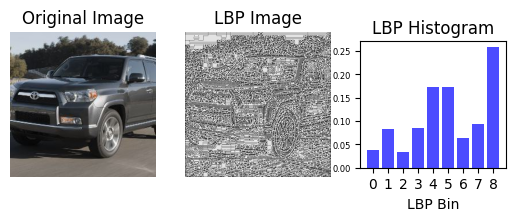

[0.02037048 0.05436707 0.02650452 0.09681702 0.18504333 0.2003479
 0.06669617 0.07687378 0.27297974]


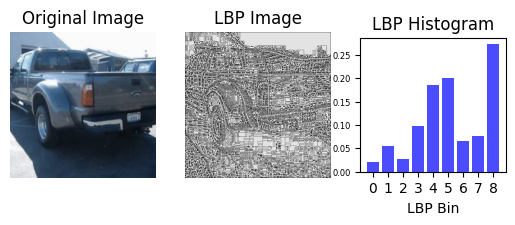

[0.008255   0.03625488 0.01747131 0.07701111 0.24958801 0.30563354
 0.05088806 0.04905701 0.20584106]


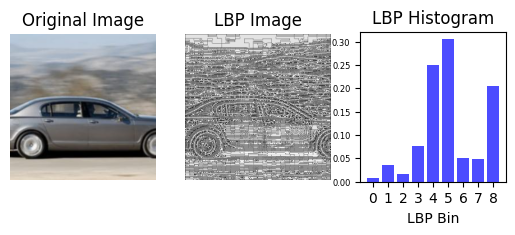

[0.02742004 0.06001282 0.04420471 0.12055969 0.29679871 0.16792297
 0.07577515 0.06265259 0.14465332]


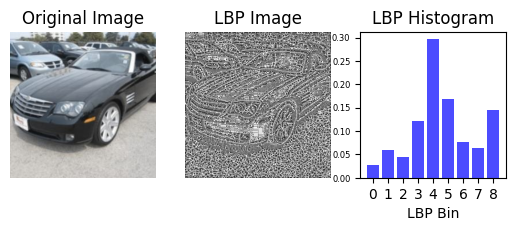

average histogram


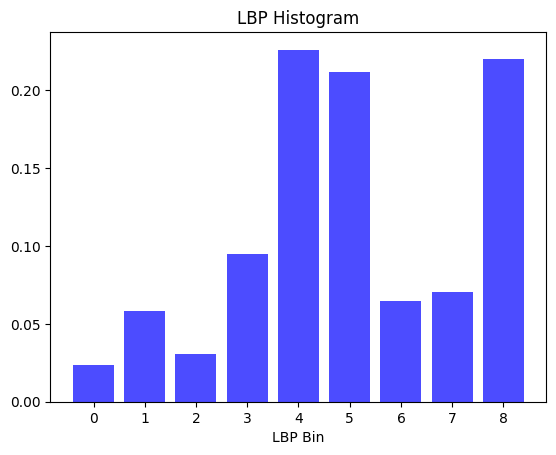

In [4]:
# Path to the folder containing images
folder_path = '../../../Images/single class samples/Blur'

# Process images in the folder
process_images_in_folder(folder_path)

## Non-Blurred Images


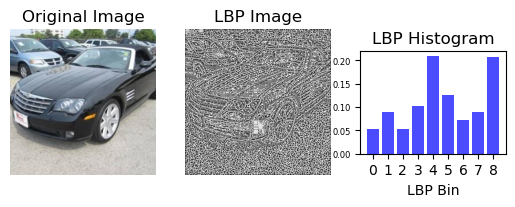

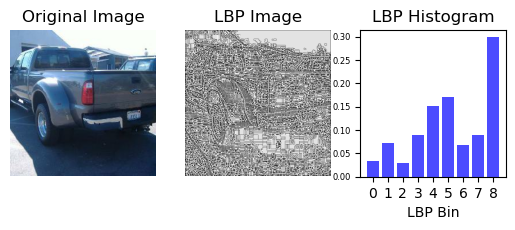

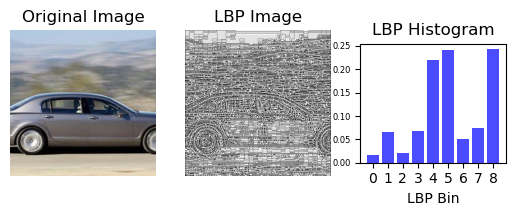

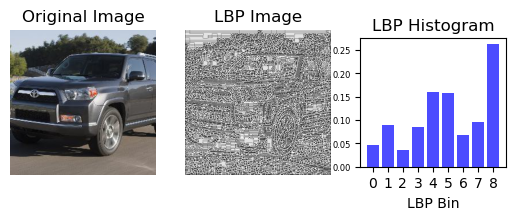

average histogram


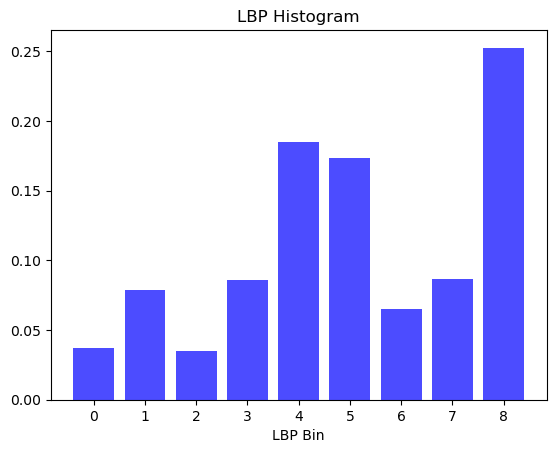

In [57]:
# Path to the folder containing images
folder_path = '../../../Images/single class samples/No Blur'

# Process images in the folder
process_images_in_folder(folder_path)